In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as pgo
pd.set_option('display.max_columns',80)

In [ ]:
sample=pd.read_csv('./data/sample_submission.csv')
train=pd.read_csv('./train.csv')


# train.info()
# df=pd.read_csv('./csv_data/homes/test.csv')
train.drop(columns=['PoolQC'],inplace=True)

In [ ]:
# numeric_df = train.select_dtypes(include=["number"])
# corr_matrix = numeric_df.corr()
# print(corr_matrix["SalePrice"].sort_values(ascending=False).head(10))
numeric_col=train.select_dtypes(include=['number']).columns[0:]
catergle_col=train.select_dtypes(include=['object']).columns[0:]

In [ ]:
numeric_mean=train[numeric_col].mean()

train[numeric_col]=train[numeric_col].fillna(numeric_mean)
train[catergle_col]=train[catergle_col].fillna('NA')

In [ ]:
dummies=pd.get_dummies( train[categrcol],drop_first=True).join(train[numeric])
corr_with =dummies.corr()
salePrice_corr=corr_with['SalePrice']
# salePrice_corr.sort_values(ascending=False).head(10)
imp_feature={}
for feature , corr in salePrice_corr.items():
    if corr > 0.5 and feature !='SalePrice':
        imp_feature[feature]=corr
print(imp_feature)

{'OverallQual': 0.7909816005838053, 'YearBuilt': 0.5228973328794967, 'YearRemodAdd': 0.5071009671113866, 'TotalBsmtSF': 0.6135805515591943, '1stFlrSF': 0.6058521846919153, 'GrLivArea': 0.7086244776126515, 'FullBath': 0.5606637627484453, 'TotRmsAbvGrd': 0.5337231555820284, 'GarageCars': 0.6404091972583519, 'GarageArea': 0.6234314389183622}


In [ ]:
train.isna().sum().sort_values(ascending=False).head(20)


Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.isna().sum().sort_values(ascending=False).head(20)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
train.tail(10)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NA,NA,1978.506164,NA,0,0,NA,NA,Y,32,45,0,0,0,0,NA,NA,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.000000,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NA,NA,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NA,Basment,2005.000000,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NA,NA,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NA,NA,1978.506164,NA,0,0,NA,NA,Y,36,56,0,0,0,0,NA,NA,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NA,Attchd,2004.000000,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NA,NA,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,1950.000000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NA,NA,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NA,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1

In [ ]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1109,1110,20,RL,107.000000,11362,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,Stone,42.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1039,Unf,0,797,1836,GasA,Ex,Y,SBrkr,1836,0,0,1836,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3,862,TA,TA,Y,125,185,0,0,0,0,NA,NA,0,3,2009,WD,Normal,280000
422,423,20,RL,100.000000,21750,Pave,NA,Reg,HLS,AllPub,Inside,Mod,Mitchel,Artery,Norm,1Fam,1Story,5,5,1954,1954,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,988,988,GasA,Ex,Y,FuseA,988,0,0,988,0,0,1,0,2,1,TA,4,Typ,0,NA,Attchd,1954.0,RFn,2,520,TA,TA,N,0,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,113000
126,127,120,RL,70.049958,4928,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NA,NA,0,2,2007,WD,Normal,128000
382,383,60,RL,79.000000,9245,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,939,939,GasA,Ex,Y,SBrkr,939,858,0,1797,0,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2006.0,RFn,2,639,TA,TA,Y,144,53,0,0,0,0,NA,NA,0,4,2007,WD,Normal,213500
1187,1188,20,RL,89.000000,12461,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1994,1995,Gable,CompShg,ImStucc,ImStucc,NA,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1456,Unf,0,168,1624,GasA,Ex,Y,SBrkr,1624,0,0,1624,1,0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1994.0,RFn,3,757,TA,TA,Y,0,114,192,0,0,0,GdPrv,NA,0,7,2006,WD,Normal,262000
764,765,120,RL,30.000000,9549,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Hip,CompShg,BrkFace,BrkFace,NA,0.0,Gd,Gd,PConc,Gd,Gd,Av,LwQ,437,GLQ,1057,0,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,1,1,2,1,Ex,6,Typ,1,Gd,Attchd,1995.0,Fin,2,481,TA,TA,Y,0,30,0,0,216,0,NA,NA,0,4,2006,WD,Normal,270000
652,653,60,RL,70.000000,8750,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,880,880,GasA,Ex,Y,SBrkr,909,807,0,1716,0,0,2,1,2,1,Gd,7,Typ,1,TA,Attchd,1996.0,RFn,2,512,TA,TA,Y,0,120,0,0,0,0,NA,NA,0,7,2009,WD,Normal,191000
584,585,50,RM,51.000000,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,7,1935,1995,Gable,CompShg,AsbShng,AsbShng,NA,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,989,584,0,1573,0,0,1,0,3,1,Gd,6,Typ,0,NA,Detchd,1935.0,Unf,1,240,TA,TA,Y,0,0,54,0,120,0,NA,NA,0,7,2009,WD,Normal,133000
300,301,190,RL,90.000000,15750,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2fmCon,1Story,5,5,1953,1953,Hip,CompShg,MetalSd,MetalSd,BrkFace,56.0,TA,TA,CBlock,TA,TA,Mn,BLQ,841,Unf,0,324,1165,GasA,TA,Y,SBrkr,1336,0,0,1336,1,0,1,0,2,1,TA,5,Typ,2,Gd,Attchd,1953.0,Unf,1,375,TA,TA,Y,0,0,0,0,0,0,NA,NA,0,6,2006,WD,Normal,157000
893,894,20,RL,70.049958,13284,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,PosN,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,1064,Unf,0,319,1383,GasA,TA,Y,SBrkr,1383,0,0,1383,1,0,1,0,

<Axes: >

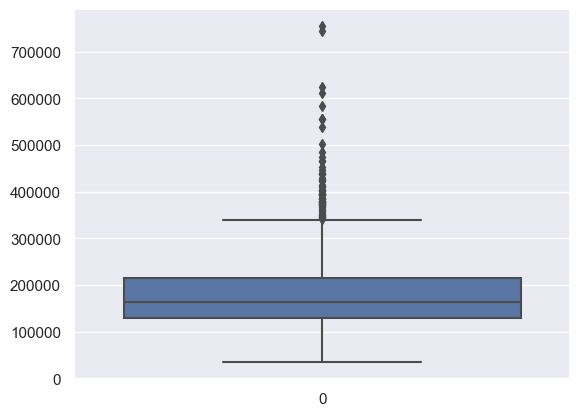

In [ ]:
sns.boxplot(data=train['SalePrice'])

In [ ]:
q3=train['SalePrice'].quantile(0.75)
q1=train['SalePrice'].quantile(0.25)
IQR=q3-q1
upper=q3+1.5 *IQR
lower=q1-1.5 * IQR
train['SalePrice']=np.where(train['SalePrice'] > upper,upper,train['SalePrice'])
train['SalePrice']=np.where(train['SalePrice'] < lower,lower,train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='LotArea'>

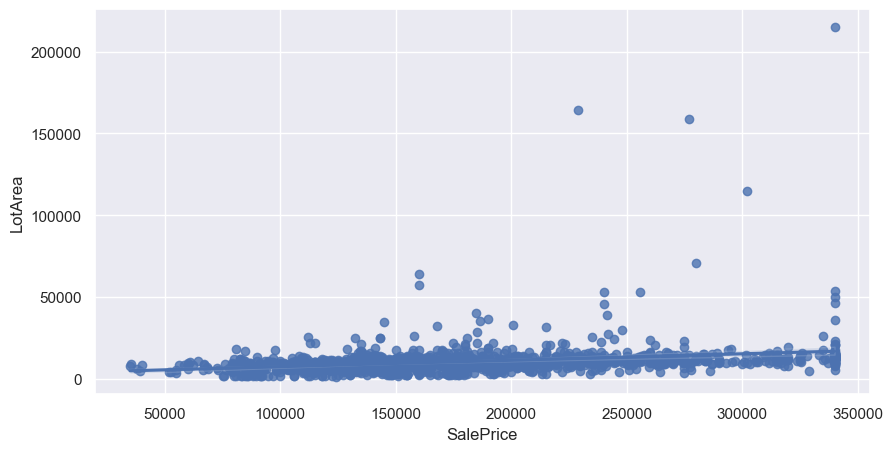

In [ ]:
plt.figure(figsize=(10,5))
# sns.scatterplot(data=train,x='SalePrice',y='LotArea',hue='YearBuilt')
sns.regplot(data=train,x='SalePrice',y='LotArea')

In [ ]:
# train[train['SalePrice']>700000][['LotArea','LotShape','YrSold','SaleType','GarageCars','SalePrice','YearBuilt','FullBath','GarageArea']]

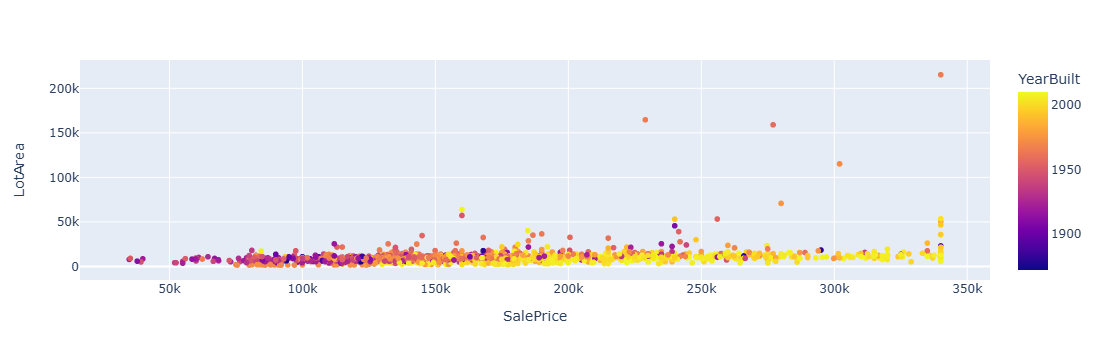

In [ ]:
px.scatter(data_frame=train,x='SalePrice',y='LotArea',color='YearBuilt',hover_data=['YrSold'])

In [ ]:
train[train['LotArea']< 50000][['LotArea','LotShape','YrSold','SaleType','GarageCars','SalePrice','YearBuilt','FullBath','GarageArea']]

,LotArea,LotShape,YrSold,SaleType,GarageCars,SalePrice,YearBuilt,FullBath,GarageArea
0,8450,Reg,2008,WD,2,208500.0,2003,2,548
1,9600,Reg,2007,WD,2,181500.0,1976,2,460
2,11250,IR1,2008,WD,2,223500.0,2001,2,608
3,9550,IR1,2006,WD,3,140000.0,1915,1,642
4,14260,IR1,2008,WD,3,250000.0,2000,2,836
...,...,...,...,...,...,...,...,...,...
1455,7917,Reg,2007,WD,2,175000.0,1999,2,460
1456,13175,Reg,2010,WD,2,210000.0,1978,2,500
1457,9042,Reg,2010,WD,1,266500.0,1941,2,252
1458,9717,Reg,2010,WD,1,142125.0,1950,1,240


In [ ]:
train_pivot=pd.pivot_table(data=train,columns='YearBuilt',index='YrSold',values='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='YrSold'>

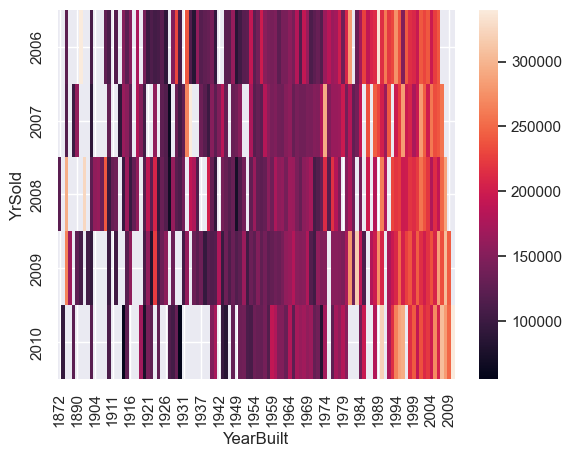

In [ ]:
sns.heatmap(data=train_pivot)

<Axes: xlabel='YrSold', ylabel='size'>

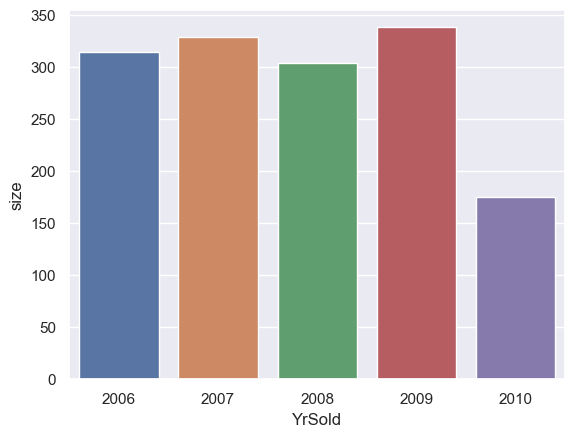

In [ ]:
group_for_barplot=train.groupby('YrSold')['SalePrice'].size().reset_index(name='size')
group_for_barplot
sns.barplot(data=group_for_barplot,x='YrSold',y='size')

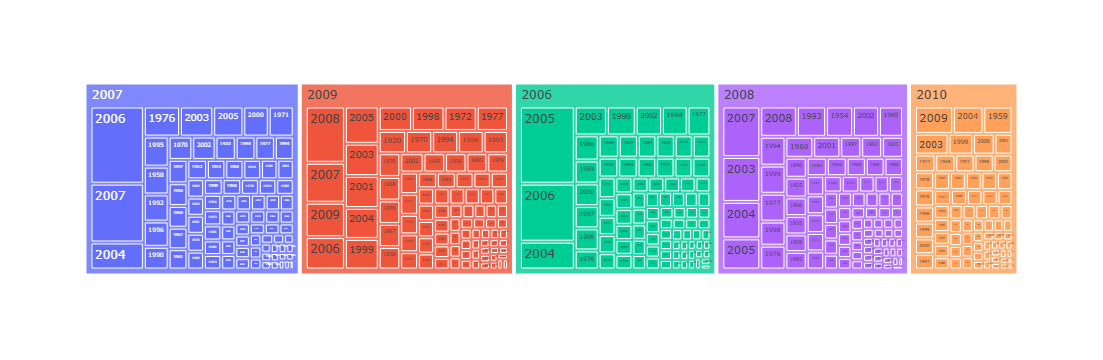

In [ ]:

fig = px.treemap(train, path=["YrSold", "YearBuilt"], values="SalePrice")
fig.show()